# Задания для самостоятельного решения


In [1]:
import numpy as np  
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [2]:
sigma = 15  #Стандартное отклонение (корень из дисперсии)
Z = 1.96  #Квантиль нормального распределения (табличное значение для a = 0.05)
Delta = 3 #Погрешность
n = int(((sigma*Z)/Delta)**2)
n

96

In [ ]:
 Минимально необходимый объем выборки для построения интервальной оценки среднего составляет 96.

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [41]:
n_1 = 25 #J=Объем выборки

#Функция дов. интервала conf_int, где loc = среднее значение (mean), scale = std (стандартное отклонение)
conf_int = stats.norm.interval(0.98, loc=130, scale=15 / np.sqrt(n_1))

L = int(conf_int[1]-conf_int[0]) #Находим длину полученного доверительного интервала, окруленную до целого
L

13

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [6]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

tvalue, pvalue = stats.ttest_ind(mens, womens)
tvalue, pvalue

(3.6635841716708892, 0.00024875321033580573)

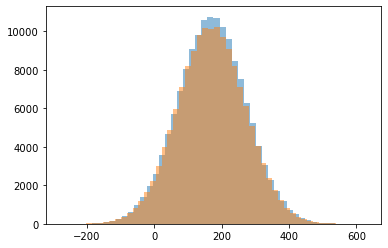

In [9]:
plt.hist(mens, bins=50, alpha=0.5);
plt.hist(womens, bins=50, alpha=0.5);

In [13]:
#По результатам наблюдаем, что p < a (0.0002 < 0.001). Следовательно, доказать гипотезу с помощью t-теста невозможно. 
#Различие между выборками значительно.

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [15]:
sigma = 150 #Стандартное отклонение
trust = 0.95 #Уровень доверия
e = 50 #Погрешность
Z = stats.norm.ppf((1+trust)/2) #Квантиль нормального распределения

n = int(((sigma*Z)/e)**2)
n

34

In [ ]:
Объем необходимой выборки для исследования среднего чека за кофе составляет 34.

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [16]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [17]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)  #Возможно пригодится эта функция.

oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

In [ ]:
# По результатам наблюдаем, что p > a (0.35 > 0.05). Нельзя сделать заключение о том, предсказывает волшебник погоду или нет.
# Критерий Фишера также значительно выше уровня значимости. Следовательно принимаем нулевую гипотезу 
#- предсказания погоды волшебником случайны.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [20]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h 

res = mean_confidence_interval(data, confidence=0.9)
print (f'Доверительный интервал для выбранных данных находятся в пределах от {round(res[0],2)} до {round(res[2], 2)}')

Доверительный интервал для выбранных данных находятся в пределах от 6.07 до 7.18


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

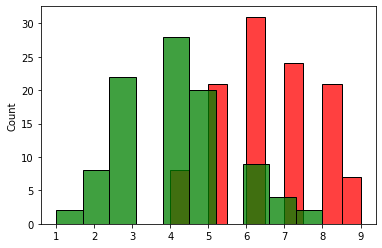

In [22]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

sns.histplot(A, color='red',bins=10);
sns.histplot(B, color='green',bins=10);

In [25]:
tvalue, pvalue = stats.ttest_ind(A, B)
tvalue, pvalue

(11.865233896372924, 4.623319592204015e-25)

In [24]:
#Оценим среднеарифметические значения выборок
print(np.mean(A))
print(np.mean(B))

6.446428571428571
4.147368421052631


In [ ]:
#Величина p очень мала. Выборки не принадлежат единому множеству.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
При условии оценки на уровне значимости 0.05, мы имеем значение p < a. Соответственно, нулевая гипотеза отвергается. 
Распределение ненормальное

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [37]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

In [38]:
t, p = stats.ttest_ind(A, B)
t, p

(-1.95300880485141, 0.051284593140469285)

In [39]:
#Имеем величину p > 0.05. Соответственно, имеются различия в эффективности препаратов незначительны.
#При p = 0.049 различия были бы значительными.

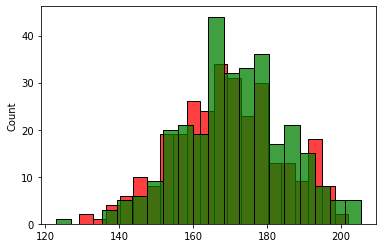

In [40]:
#Визуализация
sns.histplot(A, color='red', bins=20);
sns.histplot(B, color='green', bins=20);